In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings


In [35]:
data = pd.read_excel('Data.xlsx')
data.head()


,Product Code,Date,Actual
0,1147437,M 02.2017,576.0
1,1147437,M 03.2017,1152.0
2,1147437,M 04.2017,432.0
3,1147437,M 05.2017,1296.0
4,1147437,M 06.2017,1153.0


In [36]:
#making a column Date_split which contain a list of character 'M' and date
data['Date_split'] = data.Date.str.split(' ')
#making a column Date2 which contain only date from date column
data['Date2'] = data.Date_split.str.get(1)
# droping date and Date_split column
data.drop(['Date','Date_split'],axis=1,inplace=True)
data.head()

,Product Code,Actual,Date2
0,1147437,576.0,02.2017
1,1147437,1152.0,03.2017
2,1147437,432.0,04.2017
3,1147437,1296.0,05.2017
4,1147437,1153.0,06.2017


In [37]:
#changing date2 column into datetime from string
data['Date2']=pd.to_datetime(data['Date2'],format='%m.%Y')
data.head()

,Product Code,Actual,Date2
0,1147437,576.0,2017-02-01
1,1147437,1152.0,2017-03-01
2,1147437,432.0,2017-04-01
3,1147437,1296.0,2017-05-01
4,1147437,1153.0,2017-06-01


In [38]:
# Setting index to date column
data = data.set_index('Date2')
print(data.index)
data.drop('Product Code',axis=1,inplace=True)
data.head()

DatetimeIndex(['2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
               '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
               '2017-10-01', '2017-11-01',
               ...
               '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01'],
              dtype='datetime64[ns]', name='Date2', length=9600, freq=None)


,Actual
Date2,
2017-02-01,576.0
2017-03-01,1152.0
2017-04-01,432.0
2017-05-01,1296.0
2017-06-01,1153.0


In [39]:
data['2018']

,Actual
Date2,
2018-01-01,865.0
2018-02-01,528.0
2018-03-01,864.0
2018-04-01,1008.0
2018-05-01,1200.0
...,...
2018-08-01,NaN
2018-09-01,NaN
2018-10-01,NaN


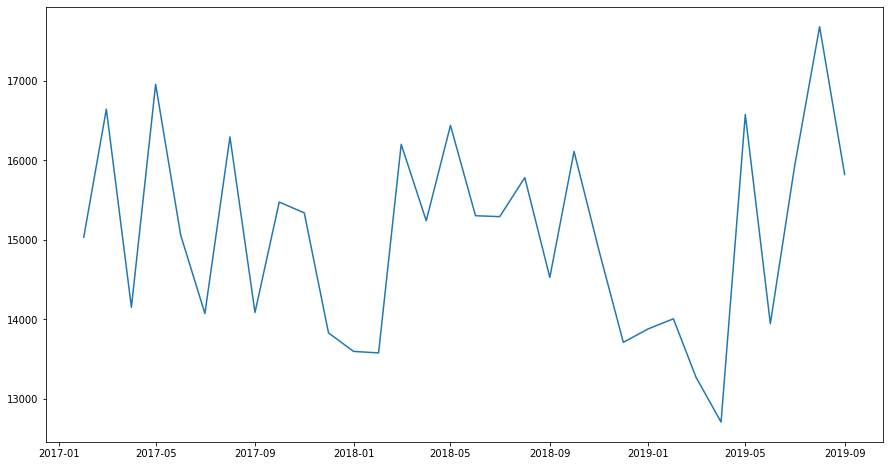

In [42]:
mean_sale = data.groupby('Date2')['Actual'].mean()
plt.figure(figsize=(15,8))
plt.plot(mean_sale)
plt.show()

In [44]:
#checking stationary
from statsmodels.tsa.stattools import adfuller
def test_stationary(ts,window):
    rolmean = pd.rolling_mean(ts,window=window)
    rolstd = pd.rolling_std(ts,window=window)
    orig = plt.plot(ts,color='blue',label='Original')
    mean = plt.plot(rolmean,color='red',label='Rolling Mean')
    std = plt.plot(rolstd,color='green',label='Rolling Std')
    plt.legend(loc='best')
    plt.show(block=False)
    print('Result of Dickey-Fuller Test')
    dftest = adfuller(ts,autolag='AIC')
    dfoutput = pd.Series(df[0:4],index=['Test Statistic','p-Value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationary(data,12)    
    

AttributeError: module 'pandas' has no attribute 'rolling_mean'